# Objective

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.



# Business Goal 



 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm


# Miscellaneous
import os

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# os.chdir(r'C:\Users\SUDIP.KANDEL\OneDrive - Accenture\WORK\FY24\PG') # Change Directory to WDIR

In [3]:
df = pd.read_csv('train.csv') # Read Data

In [4]:
df.shape # See the column length and rows

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
def check_duplicates(df, subset):
    """
    Check for duplicates in a DataFrame.

    Parameters:
    - df: DataFrame to check for duplicates.

    Returns:
    - True if no duplicates found, False otherwise.
    """
    return not df.duplicated(subset).any()


In [7]:
print(check_duplicates(df,subset='Id'))

True


# Check for other Data Issues and Data Outlier 

In [8]:
percentiles_data = df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

percentiles_data


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

In [9]:
def calculate_and_sort_missing_percentage(dataframe):
    """
    Calculate and sort missing percentages for each column in a DataFrame.

    Parameters:
    - dataframe: The DataFrame to analyze.

    Returns:
    - A Series containing missing percentages sorted in descending order.
    """
    missing_percentage = round(100 * (dataframe.isnull().sum() / len(dataframe.index)), 2)
    missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
    
    return missing_percentage_sorted


In [10]:
missing_percentage_sorted = calculate_and_sort_missing_percentage(df)
print(missing_percentage_sorted)


PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
MasVnrType       59.73
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [11]:
# We can observe that - there are huge percentage of nulls for few columns and it is not helpful for analysis. So, we need to impute or remove it

In [12]:
# List of columns where null values have a specific meaning
huge_nulls = ['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'MasVnrType',
 'MiscFeature',
 'PoolQC'] # Selecting only the categorical variables

# Impute categorical variables with 'None' for columns where nulls have meaning
for column in huge_nulls:
    df[column].fillna("None", inplace=True)


In [13]:
missing_percentage_sorted = calculate_and_sort_missing_percentage(df)



In [14]:
non_zero_missing_columns = missing_percentage_sorted[missing_percentage_sorted > 0].index.tolist()


In [15]:
for column in non_zero_missing_columns:
    print(column)
    print(df[column].describe())
    
    # Check if the column is numeric (integer or float) before calculating IQR
    if pd.api.types.is_numeric_dtype(df[column]):
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        print(f"IQR: {iqr}\n\n\n")
    else:
        print("Not a numeric column. So IQR cant be done \n")


LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
IQR: 21.0



GarageYrBlt
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
IQR: 41.0



MasVnrArea
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
IQR: 166.0



Electrical
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
Not a numeric column. So IQR cant be done 



In [16]:
def impute_missing_values(df, columns, strategy, groupby_column=None):
    """
    Impute missing values in specified columns of a DataFrame.

    Parameters:
    - df: DataFrame
    - columns: list of columns to impute
    - strategy: {'median', 'mean', 'mode'}, default='median'
      - Strategy to fill missing values.
    - groupby_column: str, optional
      - If specified, fill missing values based on the median of the specified group.

    Returns:
    - df: DataFrame
      - DataFrame with imputed values.
    """
    for col in columns:
        if groupby_column:
            df[col].fillna(df.groupby(groupby_column)[col].transform(lambda x: x.fillna(getattr(x, strategy)())), inplace=True)
        else:
            if strategy == 'median':
                df[col].fillna(df[col].median(), inplace=True)
            elif strategy == 'mean':
                df[col].fillna(df[col].mean(), inplace=True)
            elif strategy == 'mode':
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df

columns_to_impute = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea',]
df = impute_missing_values(df, columns_to_impute, strategy='median', groupby_column='Neighborhood')
df['Electrical'].dropna(inplace=True)  # Drop rows with missing values in 'Electrical' column


In [17]:
df = df.dropna(subset=['Electrical'])


In [18]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,T

In [19]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [20]:
 calculate_and_sort_missing_percentage(df)

Id               0.0
CentralAir       0.0
GarageYrBlt      0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
PoolQC           0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolArea         0.0
GarageQual       0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
Electrical       0.0
HeatingQC        0.0
MSSubClass       0.0
Heating          0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2   

In [21]:
for column in non_zero_missing_columns:
    print(column)
    print(df[column].describe())
    
    # Check if the column is numeric (integer or float) before calculating IQR
    if pd.api.types.is_numeric_dtype(df[column]):
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        print(f"IQR: {iqr}\n\n\n")
    else:
        print("Not a numeric column. So IQR cant be done \n")

LotFrontage
count    1459.000000
mean       70.197738
std        22.439474
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
IQR: 20.0



GarageYrBlt
count    1459.000000
mean     1977.315970
std        24.691871
min      1900.000000
25%      1959.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
IQR: 42.0



MasVnrArea
count    1459.000000
mean      103.476354
std       180.775016
min         0.000000
25%         0.000000
50%         0.000000
75%       165.500000
max      1600.000000
Name: MasVnrArea, dtype: float64
IQR: 165.5



Electrical
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
Not a numeric column. So IQR cant be done 



In [22]:
def outlier_handling(dataframe, column_name):
    """
    Remove outliers from a specific column in a DataFrame using the IQR method.

    Parameters:
    - dataframe: The DataFrame containing the data.
    - column_name: The name of the column for which outliers should be removed.

    Returns:
    - A DataFrame with outliers removed from the specified column.
    """
    q1 = dataframe[column_name].quantile(0.25)
    q3 = dataframe[column_name].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = dataframe[(dataframe[column_name] > lower_bound) & (dataframe[column_name] < upper_bound)]

    return filtered_data


# EDA 

In [23]:
# Lets work with categorical and numerical variables separately

In [24]:
num_df = df.select_dtypes(include=['int64','float64'])


In [25]:
# Drop the columns which are not helpful for analysis

In [26]:
num_df.drop(['Id'], axis=1, inplace=True)

In [27]:
num_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [28]:
def create_plot(x, y, df, plot_type,fig_x_axis,fig_y_axis):
    """
    Create different types of plots based on the parameters.

    Parameters:
    - x: Column name for the x-axis
    - y: Column name for the y-axis
    - df: DataFrame containing the data
    - plot_type: Type of plot to be created ('bar', 'box', 'line', etc.)
    - title: Title for the plot

    Returns:
    - None
    """
    plt.figure(figsize=(fig_x_axis, fig_y_axis))  # Adjust the figure size as needed

    if plot_type == 'bar':
        sns.barplot(x=x, y=y, data=df)
        title = f'Bar Plot for {x} vs {y}'
    elif plot_type == 'count':
        sns.countplot(x=x, data=df)
        title = f'Count Plot for {x}'
    elif plot_type == 'box':
        sns.boxplot(x=x, y=y, data=df)
        title = f'Box Plot for {x} vs {y}'
    elif plot_type == 'line':
        sns.lineplot(x=x, y=y, data=df)
        title = f'Line Plot for {x} vs {y}'
    elif plot_type == 'dist':
        sns.distplot(df[x].dropna(), kde=False, bins=20)  # Adjust parameters as needed
        title = f'Distribution Plot for {x}'
    elif plot_type == 'hist':
        plt.hist(df[x].dropna(), bins=20)  # Adjust parameters as needed
        title = f'Histogram for {x}'
    elif plot_type == 'barchart':
        df[x].value_counts().plot(kind='bar')
        title = f'Bar Chart for {x}'
    elif plot_type == 'pie':
        plt.pie(df[x].value_counts(), labels=df[x].value_counts().index, autopct='%1.1f%%', startangle=90)
        title = f'Pie Chart for {x}'
    elif plot_type == 'heat':
        sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
        title = f'Heat Map for {df.shape[0]}'
    elif plot_type == 'joint':
        sns.jointplot(x = df[x], y = df[y])
        title = f'Joint Plot for {df.shape[0]}'

    else:
        print('Please provide appropriate request')

    plt.show()
    print('\n\n\n\n')




# Generate Bar Plots Now 

In [29]:
y='SalePrice'
x=['Neighborhood', 'OverallCond', 'OverallQual']

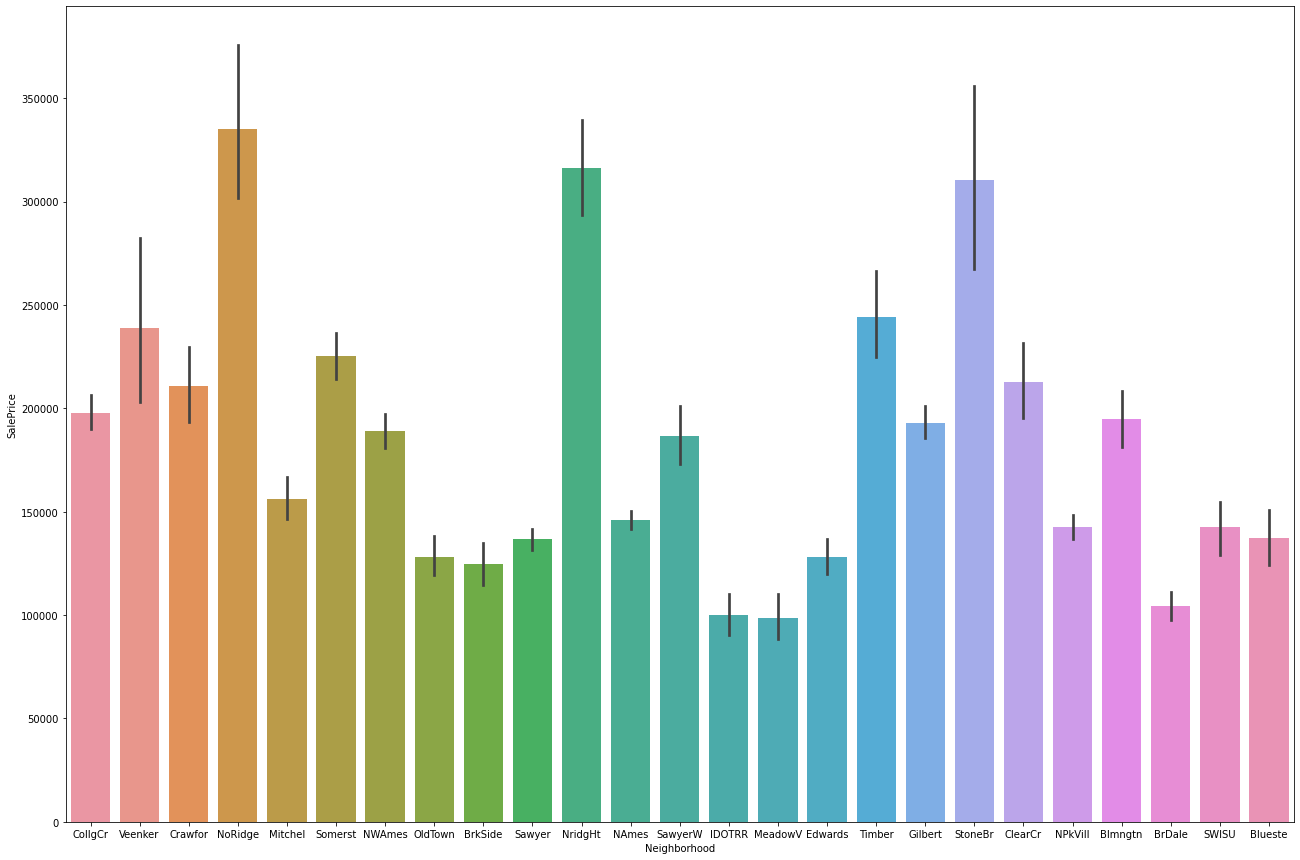

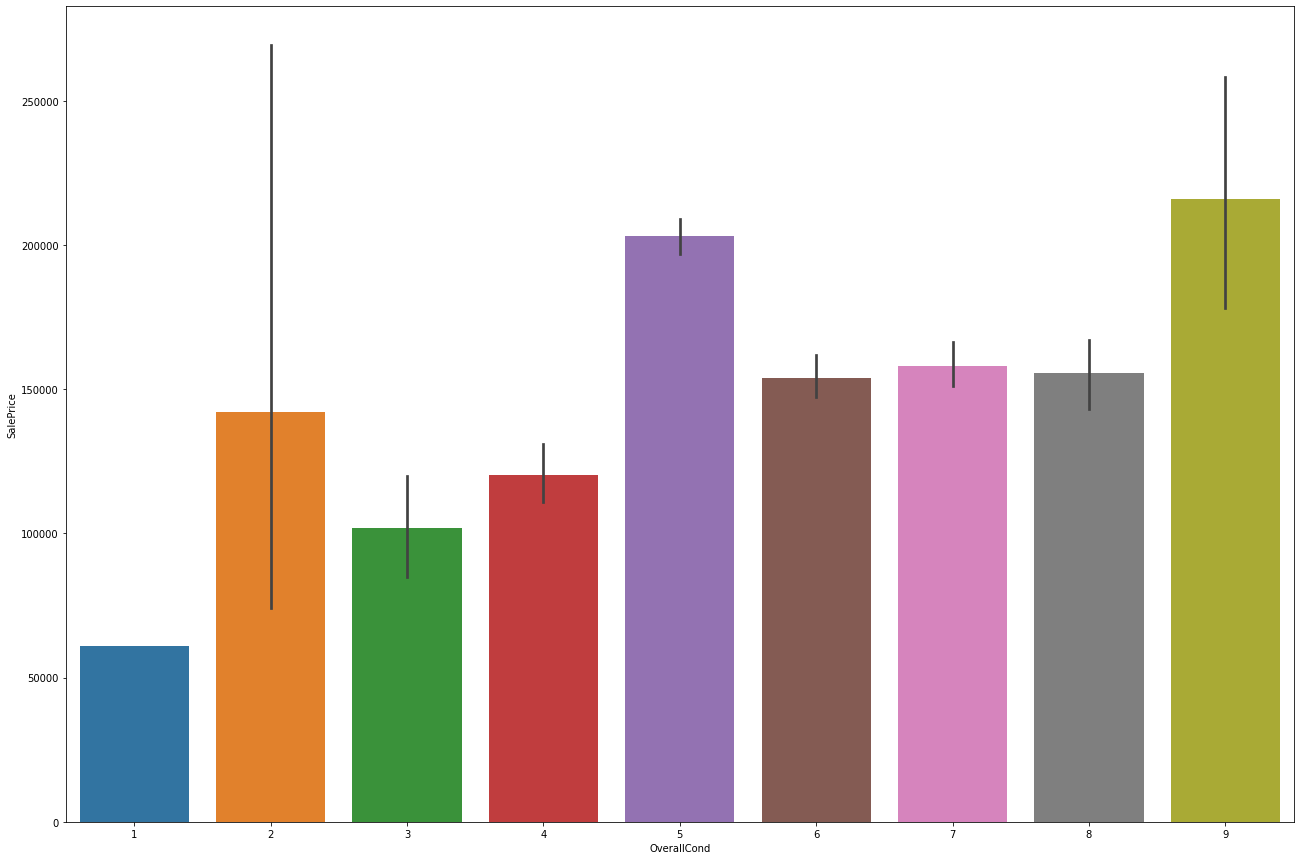

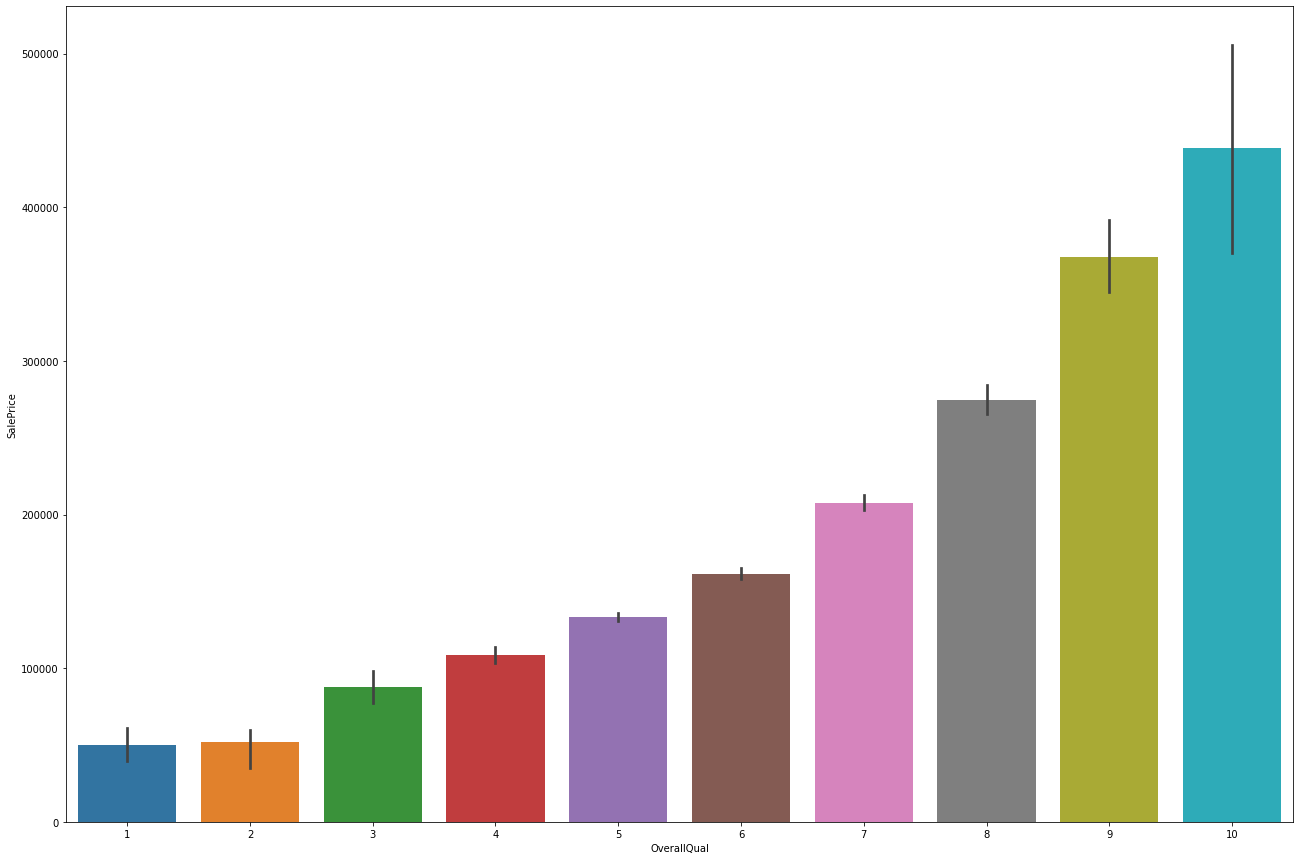

In [30]:
for col in x:
    create_plot(col,y,df,'bar',22,15)

### From Diagram 1 - Neighbourhood vs SalePrice - 1. we can observe that almost 2-3 neighbourhood are overly priced and few are low priced

In [31]:
### From Diagram 2 - Neighbourhood vs OverallCond - 1. we can observe that almost 9 and 5 are most occuring ones

In [32]:
## From Diagram 3 - It is having a increasing trend ie Overall Quality increases and sales price also increases.

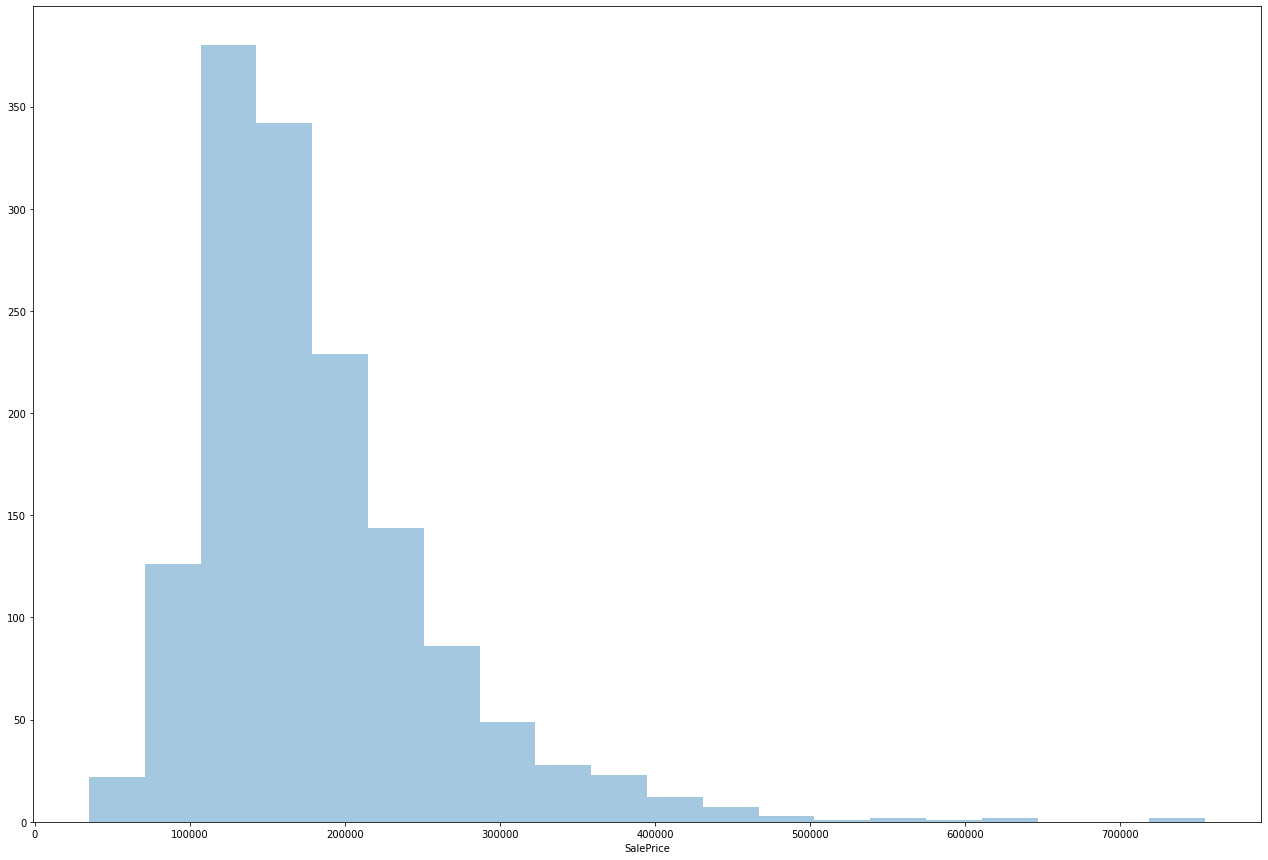

In [33]:
create_plot('SalePrice','',df,'dist',22,15)

In [34]:
#If we observe the distribution we can see that sales is skewed towards left and there are few outliers too.

In [35]:
# Since the data is skewed so lets Standarize and convert to log format.

In [36]:
num_df['SalePrice'] = np.log1p(num_df['SalePrice'])  # Apply log transformation


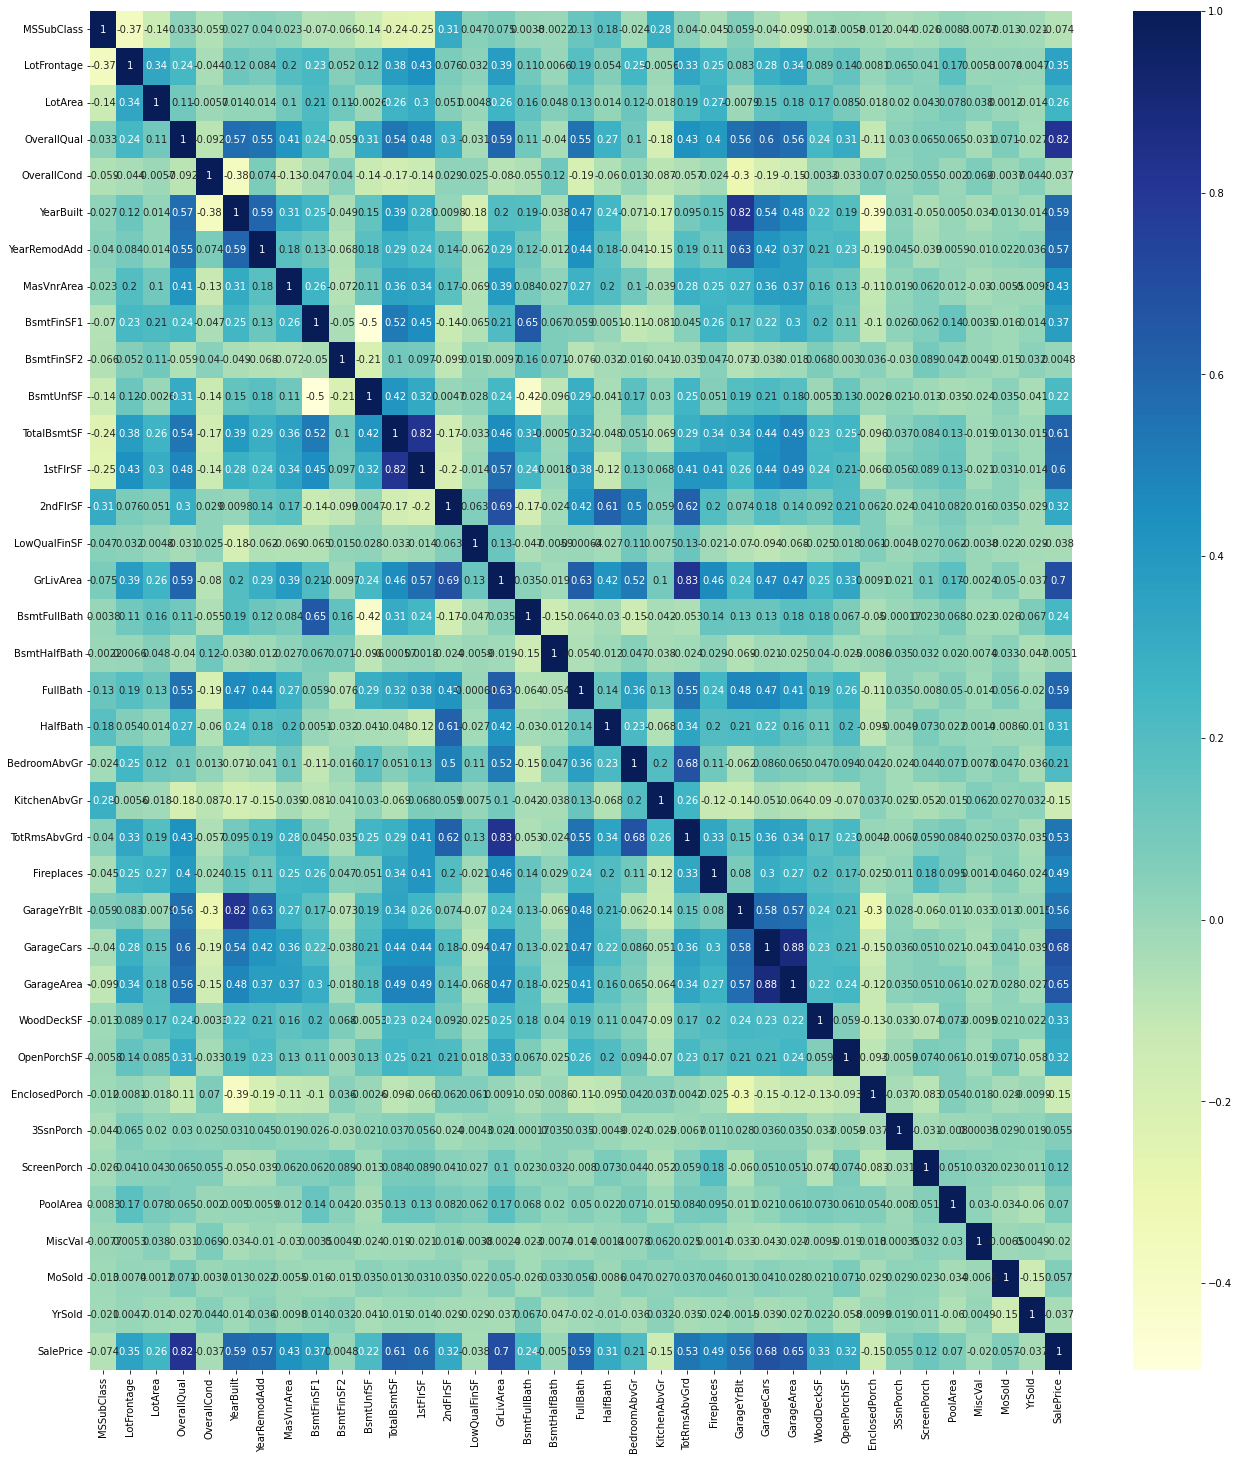

In [37]:
create_plot('SalePrice','',num_df,'heat',22,25)

In [38]:
# lets find those columns which are correlated but has no affect on the Target Variable

In [39]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [40]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,T

In [41]:
# uncomment for scatterplot

In [42]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set()
# cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']

# # Creating scatterplots
# plt.figure(figsize=(12, 8))
# for i in range(len(cols)):
#     for j in range(len(cols)):
#         plt.subplot(len(cols), len(cols), i * len(cols) + j + 1)
#         if i == j:
#             sns.histplot(df[cols[i]], kde=True)
#         else:
#             sns.scatterplot(x=cols[j], y=cols[i], data=df)

# plt.tight_layout()
# plt.show()


In [43]:
# Drop all the columns which are not contributing to the analysis

In [44]:

df = df.drop(['GarageYrBlt', 'TotRmsAbvGrd', 'BsmtUnfSF','GarageCars'], axis = 1)    

In [45]:
# Create a new derived column. It is very important to know the timeframe/age of the Property

In [46]:
df['AgeOfProperty']= (df['YrSold'] - df['YearBuilt']) # We want to see the different/age 

In [47]:
# # Now we can have a look at the relationship with target variable
# sns.jointplot(x = df['AgeOfProperty'], y = df['SalePrice'])
# plt.show() #uncomment it

In [48]:
df= df.drop(['MoSold','YrSold', 'YearBuilt', 'YearRemodAdd', 'Street', 'Utilities', 'Id'], axis=1) #Note: we are also dropping few columns because of low varaince.

In [49]:

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

value_counts_by_column = {}

for column in numeric_columns:
    value_counts_by_column[column] = df[column].value_counts()

sorted_value_counts_by_column = {col: counts.sort_values() for col, counts in value_counts_by_column.items()}

# Print the sorted value counts for each numeric column
for column, sorted_value_counts in sorted_value_counts_by_column.items():
    print(f"Column: {column}")
    print(sorted_value_counts)
    print("\n\n-------XX---------\n\n")


Column: MSSubClass
MSSubClass
40       4
180     10
45      12
75      16
85      20
190     30
90      52
80      57
70      60
160     63
30      69
120     87
50     144
60     299
20     536
Name: count, dtype: int64


-------XX---------


Column: LotFrontage
LotFrontage
46.0       1
88.5       1
149.0      1
33.0       1
160.0      1
        ... 
73.0      69
65.0      74
70.0      94
80.0     112
60.0     152
Name: count, Length: 115, dtype: int64


-------XX---------


Column: LotArea
LotArea
23257     1
18800     1
10690     1
11911     1
9150      1
         ..
8400     14
9000     14
6000     17
9600     24
7200     25
Name: count, Length: 1072, dtype: int64


-------XX---------


Column: OverallQual
OverallQual
1       2
2       3
10     18
3      20
9      43
4     116
8     168
7     319
6     374
5     396
Name: count, dtype: int64


-------XX---------


Column: OverallCond
OverallCond
1      1
2      5
9     22
3     25
4     57
8     72
7    205
6    252
5    820
Name: 

In [50]:
# After observing the values and its values these columns can be safely dropped as it is having maximum null and no contribution to target variable

In [51]:
df[['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ]]

,PoolQC,MiscVal,Alley,RoofMatl,Condition2,Heating,GarageCond,Fence,Functional
0,None,0,None,CompShg,Norm,GasA,TA,None,Typ
1,None,0,None,CompShg,Norm,GasA,TA,None,Typ
2,None,0,None,CompShg,Norm,GasA,TA,None,Typ
3,None,0,None,CompShg,Norm,GasA,TA,None,Typ
4,None,0,None,CompShg,Norm,GasA,TA,None,Typ
...,...,...,...,...,...,...,...,...,...
1455,None,0,None,CompShg,Norm,GasA,TA,None,Typ
1456,None,0,None,CompShg,Norm,GasA,TA,MnPrv,Min1
1457,None,2500,None,CompShg,Norm,GasA,TA,GdPrv,Typ
1458,None,0,None,CompShg,Norm,GasA,TA,None,Typ


In [52]:
 df = df.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)


In [53]:
numerical_columns = list(df.select_dtypes(include=['int64', 'float']).columns)
categorical_columns = list(df.select_dtypes(include='object').columns)


In [54]:
# Feature creation selection

In [55]:
df = pd.get_dummies(df, drop_first=True )
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,AgeOfProperty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,208500,5,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,181500,31,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,223500,7,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,140000,91,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,250000,8,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [56]:
X = df.drop(['SalePrice'], axis=1) # All other metrics except target var
y = df['SalePrice'] #target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [57]:
# Standarizing the data

In [102]:
columns_to_scale = ['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'AgeOfProperty',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotalBsmtSF',
 'WoodDeckSF']


In [103]:
scaler = StandardScaler()


X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.fit_transform(X_test[columns_to_scale])



In [104]:


# Step 1: Create a Linear Regression model
lm = LinearRegression()

# Step 2: Fit the Linear Regression model on the training data
lm.fit(X_train, y_train)

# Step 3: Running RFE for top 100 variables
# RFE (Recursive Feature Elimination) is used to select the top 100 features
# It recursively removes the least significant features until the specified number of features is reached
rfe = RFE(lm, n_features_to_select=100)            
rfe = rfe.fit(X_train, y_train)


In [105]:
# Check the ranks after RFE
# Creating a list of tuples with column names, whether they are selected by RFE, and their respective rankings
rfe_results = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Display the results
print(rfe_results)


[('MSSubClass', False, 110), ('LotFrontage', False, 28), ('LotArea', True, 1), ('OverallQual', True, 1), ('OverallCond', False, 5), ('MasVnrArea', False, 64), ('BsmtFinSF1', False, 97), ('BsmtFinSF2', False, 86), ('TotalBsmtSF', False, 74), ('1stFlrSF', True, 1), ('2ndFlrSF', True, 1), ('LowQualFinSF', True, 1), ('GrLivArea', True, 1), ('BsmtFullBath', False, 57), ('BsmtHalfBath', False, 89), ('FullBath', False, 53), ('HalfBath', False, 60), ('BedroomAbvGr', False, 92), ('KitchenAbvGr', False, 70), ('Fireplaces', False, 47), ('GarageArea', False, 35), ('WoodDeckSF', False, 78), ('OpenPorchSF', False, 106), ('EnclosedPorch', False, 108), ('3SsnPorch', False, 80), ('ScreenPorch', False, 76), ('PoolArea', False, 102), ('AgeOfProperty', True, 1), ('MSZoning_FV', True, 1), ('MSZoning_RH', True, 1), ('MSZoning_RL', True, 1), ('MSZoning_RM', True, 1), ('LotShape_IR2', False, 32), ('LotShape_IR3', True, 1), ('LotShape_Reg', False, 99), ('LandContour_HLS', True, 1), ('LandContour_Low', False, 7

In [107]:
# Select the top 100 variables based on RFE support
selected_columns = X_train.columns[rfe.support_]

# Display the selected columns
print(selected_columns)

X_train.columns[~rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

Index(['LotArea', 'OverallQual', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'AgeOfProperty', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Lvl', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAn', 'Condition1_RRNe', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'RoofSty

In [108]:
# Create a DataFrame with only the selected columns from X_train
X_train_rfe = pd.DataFrame(X_train[selected_columns])

# Predictions on the training set
y_train_pred = lm.predict(X_train)

# Evaluate the R-squared score on the training set
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("R-squared (Training Set):", r2_train)

# Predictions on the test set
y_test_pred = lm.predict(X_test)

# Evaluate the R-squared score on the test set
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("R-squared (Test Set):", r2_test)

# Check the ranks for the test set
rfe_results_test = list(zip(X_test.columns, rfe.support_, rfe.ranking_))
print("RFE results for the test set:", rfe_results_test)


R-squared (Training Set): 0.9021442744623289
R-squared (Test Set): -4.083277922925497e+20
RFE results for the test set: [('MSSubClass', False, 110), ('LotFrontage', False, 28), ('LotArea', True, 1), ('OverallQual', True, 1), ('OverallCond', False, 5), ('MasVnrArea', False, 64), ('BsmtFinSF1', False, 97), ('BsmtFinSF2', False, 86), ('TotalBsmtSF', False, 74), ('1stFlrSF', True, 1), ('2ndFlrSF', True, 1), ('LowQualFinSF', True, 1), ('GrLivArea', True, 1), ('BsmtFullBath', False, 57), ('BsmtHalfBath', False, 89), ('FullBath', False, 53), ('HalfBath', False, 60), ('BedroomAbvGr', False, 92), ('KitchenAbvGr', False, 70), ('Fireplaces', False, 47), ('GarageArea', False, 35), ('WoodDeckSF', False, 78), ('OpenPorchSF', False, 106), ('EnclosedPorch', False, 108), ('3SsnPorch', False, 80), ('ScreenPorch', False, 76), ('PoolArea', False, 102), ('AgeOfProperty', True, 1), ('MSZoning_FV', True, 1), ('MSZoning_RH', True, 1), ('MSZoning_RL', True, 1), ('MSZoning_RM', True, 1), ('LotShape_IR2', False,

In [109]:
# Select the top 100 variables for the test set
selected_columns_test = X_test.columns[rfe.support_]

# Create a DataFrame with only the selected columns from X_test
X_test_rfe = X_test[selected_columns_test]

# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

# Applying Lasso Regression with hyperparameter tuning

# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 
                   20, 50, 100, 500, 1000 ]}

# Initialize Lasso regression
lasso = Lasso()

# Cross-validation
folds = 5
model_cv = GridSearchCV(estimator=lasso, 
                        param_grid=params, 
                        scoring='neg_mean_absolute_error', 
                        cv=folds, 
                        return_train_score=True,
                        verbose=1)

# Fit the model
model_cv.fit(X_train_rfe, y_train)


X_train (1021, 210)
y_train (1021,)
Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.152852,0.021682,0.001645,0.002760,0.0001,{'alpha': 0.0001},-22180.516007,-19599.514809,-22633.226165,-23762.114110,-23894.193382,-22413.912894,1551.275981,27,-15786.127348,-15836.092488,-13153.389178,-15188.181329,-15383.245332,-15069.407135,988.455445
1,0.144021,0.017748,0.009205,0.007528,0.001,{'alpha': 0.001},-22180.430883,-19603.208541,-22633.155763,-23761.849842,-23894.266073,-22414.582220,1549.904355,28,-15786.126024,-15836.084390,-13153.367960,-15188.167226,-15383.244292,-15069.397978,988.461817
2,0.149929,0.016281,0.012746,0.004759,0.01,{'alpha': 0.01},-22179.536719,-19602.765461,-22632.424899,-23759.207399,-23894.467568,-22413.680409,1549.650848,26,-15786.125280,-15836.035134,-13153.179319,-15188.045306,-15383.257262,-15069.328460,988.525095
3,0.155412,0.015277,0.004215,0.003743,0.05,{'alpha': 0.05},-22176.606815,-19597.571419,-22629.290316,-23747.435246,-23887.776644,-22407.736088,1548.214866,25,-15786.359126,-15835.842483,-13152.340328,-15187.679327,-15383.321003,-15069.108453,988.849657
4,0.138414,0.017811,0.010075,0.004309,0.1,{'alpha': 0.1},-22173.422620,-19590.476546,-22623.751770,-23732.496078,-23879.308318,-22399.891066,1546.526627,24,-15786.933693,-15835.669654,-13151.251344,-15187.269235,-15383.406722,-15068.906130,989.324032


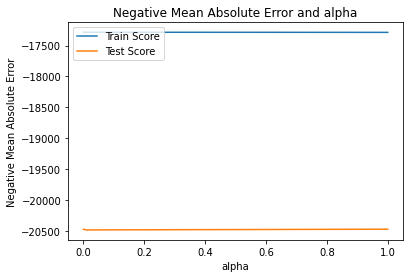

In [110]:
# Store cross-validation results in a DataFrame
cv_results_df = pd.DataFrame(model_cv.cv_results_)

# Filter results for alpha values less than or equal to 1
cv_results_df = cv_results_df[cv_results_df['param_alpha'] <= 1]

# Display the first few rows of the cross-validation results
cv_results_df.head()

# Convert alpha to float32 for plotting
cv_results_df['param_alpha'] = cv_results_df['param_alpha'].astype('float32')

# Plot mean train and test scores with alpha
plt.plot(cv_results_df['param_alpha'], cv_results_df['mean_train_score'], label='Train Score')
plt.plot(cv_results_df['param_alpha'], cv_results_df['mean_test_score'], label='Test Score')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(loc='upper left')
plt.show()


array([-9.27354320e+01, -5.54264168e+03,  8.38100078e+03,  9.63979037e+03,
        7.54928100e+03,  2.75129351e+03, -1.16493606e+03,  9.17664499e+02,
       -1.53976270e+03,  1.68700731e+04,  2.77783032e+04,  4.78601774e+02,
        3.97893973e+03,  3.97899547e+03,  1.08128243e+03,  7.00860102e+03,
        2.96839404e+03, -8.99185636e+02, -2.15832382e+03,  3.07714382e+03,
        4.15105946e+03,  1.32829590e+03, -1.94404597e+02,  1.36788626e+02,
        1.31864308e+03,  2.02798984e+03,  3.73599146e+02, -3.91511846e+03,
        3.77495957e+04,  3.14889337e+04,  2.93919398e+04,  2.77441849e+04,
        6.60759122e+03, -4.32333780e+04,  5.36816595e+02,  1.62014321e+04,
       -1.08760067e+03,  1.40471768e+04,  1.61848320e+02, -8.02971040e+03,
       -2.82635720e+04, -4.79635711e+03,  5.91264792e+03, -3.32798858e+04,
       -1.52847840e+04, -8.66124795e+03, -2.61120901e+04, -1.95567562e+04,
       -2.09135789e+04, -8.96346932e+03, -3.80885045e+04, -2.23972221e+04,
       -3.16390708e+04, -

[('constant', 236188.165),
 ('MSSubClass', -92.735),
 ('LotFrontage', -5542.642),
 ('LotArea', 8381.001),
 ('OverallQual', 9639.79),
 ('OverallCond', 7549.281),
 ('MasVnrArea', 2751.294),
 ('BsmtFinSF1', -1164.936),
 ('BsmtFinSF2', 917.664),
 ('TotalBsmtSF', -1539.763),
 ('1stFlrSF', 16870.073),
 ('2ndFlrSF', 27778.303),
 ('LowQualFinSF', 478.602),
 ('GrLivArea', 3978.94),
 ('BsmtFullBath', 3978.995),
 ('BsmtHalfBath', 1081.282),
 ('FullBath', 7008.601),
 ('HalfBath', 2968.394),
 ('BedroomAbvGr', -899.186),
 ('KitchenAbvGr', -2158.324),
 ('Fireplaces', 3077.144),
 ('GarageArea', 4151.059),
 ('WoodDeckSF', 1328.296),
 ('OpenPorchSF', -194.405),
 ('EnclosedPorch', 136.789),
 ('3SsnPorch', 1318.643),
 ('ScreenPorch', 2027.99),
 ('PoolArea', 373.599),
 ('AgeOfProperty', -3915.118),
 ('MSZoning_FV', 37749.596),
 ('MSZoning_RH', 31488.934),
 ('MSZoning_RL', 29391.94),
 ('MSZoning_RM', 27744.185),
 ('LotShape_IR2', 6607.591),
 ('LotShape_IR3', -43233.378),
 ('LotShape_Reg', 536.817),
 ('LandC

0.9021473353473254
0.8156853375067129
RMSE : 32984.61995471487


,Variable,Coeff
0,constant,236188.165
1,MSSubClass,-92.735
2,LotFrontage,-5542.642
3,LotArea,8381.001
4,OverallQual,9639.790


,Variable,Coeff
0,constant,236188.165
113,Exterior2nd_ImStucc,68516.835
203,SaleType_New,47945.554
111,Exterior2nd_CmentBd,39952.256
66,Neighborhood_StoneBr,39323.670
...,...,...
79,BldgType_Twnhs,-41193.424
34,LotShape_IR3,-43233.378
94,Exterior1st_BrkComm,-53502.255
92,RoofStyle_Shed,-53870.369


,Variable,Coeff
0,constant,236188.165
113,Exterior2nd_ImStucc,68516.835
203,SaleType_New,47945.554
111,Exterior2nd_CmentBd,39952.256
66,Neighborhood_StoneBr,39323.670
...,...,...
79,BldgType_Twnhs,-41193.424
34,LotShape_IR3,-43233.378
94,Exterior1st_BrkComm,-53502.255
92,RoofStyle_Shed,-53870.369


['constant', 'Exterior2nd_ImStucc', 'SaleType_New', 'Exterior2nd_CmentBd', 'Neighborhood_StoneBr', 'MSZoning_FV', 'GarageType_Basment', 'BsmtCond_Po', 'SaleType_Con', 'MSZoning_RH', 'MSZoning_RL', 'GarageType_None', 'GarageType_Detchd', 'Exterior2nd_VinylSd', '2ndFlrSF', 'MSZoning_RM', 'GarageType_CarPort', 'Neighborhood_NoRidge', 'GarageType_Attchd', 'GarageType_BuiltIn', 'Exterior2nd_AsphShn', 'Exterior2nd_Wd Sdng', 'Exterior2nd_BrkFace', 'HouseStyle_1Story', 'SaleType_ConLD', 'Exterior2nd_MetalSd', 'HouseStyle_1.5Unf', 'Condition1_RRAn', 'MasVnrType_Stone', 'Exterior2nd_HdBoard', 'Foundation_Stone', 'Exterior2nd_Brk Cmn', '1stFlrSF', 'LandContour_HLS', 'SaleCondition_AdjLand', 'Exterior2nd_Plywood', 'LandContour_Lvl', 'Neighborhood_NridgHt', 'Condition1_PosN', 'Condition1_Norm', 'Exterior2nd_Wd Shng', 'BsmtExposure_Gd', 'Exterior2nd_Other', 'SaleType_CWD', 'GarageQual_Gd', 'MasVnrType_None', 'OverallQual', 'SaleCondition_Alloca', 'Foundation_PConc', 'LotArea', 'SaleType_Oth', 'House

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
175,1.193985,-0.072431,1.267847,0.331944,0.470426,0.072682,0.608454,0.166827,0.590110,1.103147,False,-0.271826,0.777509,-0.259705,-0.751505
710,-1.490654,-2.226377,0.369532,-1.767840,-2.202678,-0.963607,-0.944625,-0.576115,-0.626716,-0.809099,False,-0.709339,-1.030775,-0.259705,-0.751505
1147,0.078047,0.645551,1.267847,-0.790044,-1.116730,-0.366165,0.608454,0.112978,0.198988,-0.809099,False,-0.709339,-1.030775,-0.259705,-0.751505
841,0.031080,-0.790413,2.166161,-0.911705,0.980914,-0.963607,0.608454,-0.023615,-0.452883,-0.809099,True,0.467421,0.777509,-0.259705,-0.187282
220,-0.045946,0.645551,-0.528783,0.998828,0.929866,-0.963607,-0.944625,-0.150576,0.112072,-0.809099,True,-0.211479,0.777509,-0.259705,2.077669


In [117]:
# Set the Lasso regularization strength (alpha)
alpha = 0.01

# Initialize Lasso model with the specified alpha
lasso = Lasso(alpha=alpha)

# Fit Lasso regression model on the training set
lasso.fit(X_train, y_train)

# Display the coefficients obtained from Lasso
lasso_coefficients = lasso.coef_

# Display model parameters (coefficients and intercept)
model_parameters = [round(lasso.intercept_, 3)] + [round(x, 3) for x in lasso_coefficients]
columns_with_constant = X.columns.insert(0, "constant")

# Display the variables and their corresponding coefficients after Lasso
list(zip(columns_with_constant, model_parameters))

# Initialize a new Lasso regression model with the chosen alpha
lm = Lasso(alpha=0.01)

# Fit Lasso regression model on the training set
lm.fit(X_train, y_train)

# Prediction on the training set (Using R-squared)
y_train_pred = lm.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("R-squared (Training Set):", r2_train)

# Prediction on the test set (Using R-squared)
y_test_pred = lm.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("R-squared (Test Set):", r2_test)

# Display the root mean squared error (RMSE) on the test set
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', rmse_test)

# Creating a DataFrame for the coefficients obtained from Lasso

# Zip the column names and their corresponding coefficients
model_mapping = list(zip(cols, model_parameters))

# Create a DataFrame to store the variable names and their coefficients
parameters_df = pd.DataFrame(model_mapping)
parameters_df.columns = ['Variable', 'Coeff']

# Sort the coefficients in ascending order
parameters_df = parameters_df.sort_values(['Coeff'], axis=0, ascending=False)

# Display the DataFrame with sorted coefficients
parameters_df

# Choose variables whose coefficients are non-zero

# Create a new DataFrame with only the variables having non-zero coefficients
prediction_df = pd.DataFrame(parameters_df[(parameters_df['Coeff'] != 0)])

# Display the DataFrame with selected variables
prediction_df

# Extract the variable names with non-zero coefficients from Lasso
lasso_variables = list(prediction_df['Variable'])

# Display the selected variable names
print("Selected Variables from Lasso:", lasso_variables)


X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]


R-squared (Training Set): 0.9021473353473254
R-squared (Test Set): 0.8156853375067127
RMSE: 32984.619954714886
Selected Variables from Lasso: ['constant', 'Exterior2nd_ImStucc', 'SaleType_New', 'Exterior2nd_CmentBd', 'Neighborhood_StoneBr', 'MSZoning_FV', 'GarageType_Basment', 'BsmtCond_Po', 'SaleType_Con', 'MSZoning_RH', 'MSZoning_RL', 'GarageType_None', 'GarageType_Detchd', 'Exterior2nd_VinylSd', '2ndFlrSF', 'MSZoning_RM', 'GarageType_CarPort', 'Neighborhood_NoRidge', 'GarageType_Attchd', 'GarageType_BuiltIn', 'Exterior2nd_AsphShn', 'Exterior2nd_Wd Sdng', 'Exterior2nd_BrkFace', 'HouseStyle_1Story', 'SaleType_ConLD', 'Exterior2nd_MetalSd', 'HouseStyle_1.5Unf', 'Condition1_RRAn', 'MasVnrType_Stone', 'Exterior2nd_HdBoard', 'Foundation_Stone', 'Exterior2nd_Brk Cmn', '1stFlrSF', 'LandContour_HLS', 'SaleCondition_AdjLand', 'Exterior2nd_Plywood', 'LandContour_Lvl', 'Neighborhood_NridgHt', 'Condition1_PosN', 'Condition1_Norm', 'Exterior2nd_Wd Shng', 'BsmtExposure_Gd', 'Exterior2nd_Other', 'S

# RIDGE

In [119]:
# List of alpha values to tune (regularization strength for Ridge regression)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 
                   20, 50, 100, 500, 1000]}

# Initialize Ridge regression model
ridge = Ridge()

# Cross-validation setup
folds = 5  # Number of folds for cross-validation
model_cv = GridSearchCV(estimator=ridge, 
                        param_grid=params, 
                        scoring='neg_mean_absolute_error', 
                        cv=folds, 
                        return_train_score=True,
                        verbose=1)            

# Fit the Ridge regression model with hyperparameter tuning
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

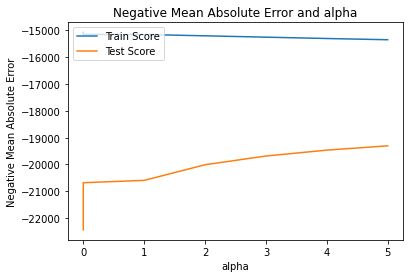

R-squared (Training Set): 0.8991664410399917
R-squared (Test Set): 0.8360323168704671
RMSE: 31110.76368105861


(205, 2)

In [121]:
# Extracting and displaying cross-validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 5]
cv_results.head()

# Plotting mean test and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['Train Score', 'Test Score'], loc='upper left')
plt.show()

# Choosing alpha for Ridge regression and fitting the model
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge_coefficients = ridge.coef_

# Displaying Ridge model parameters
model_parameters = [round(ridge.intercept_, 3)] + [round(x, 3) for x in ridge_coefficients]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

# Ridge regression with the chosen alpha
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = lm.predict(X_train)
print("R-squared (Training Set):", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# Predictions on the test set
y_test_pred = lm.predict(X_test)
print("R-squared (Test Set):", metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Creating a DataFrame for Ridge Coefficients
ridge_coefficients_df = list(zip(cols, model_parameters))
results_df = pd.DataFrame(ridge_coefficients_df)
results_df.columns = ['Variable', 'Coeff']

# Sorting the coefficients in ascending order
results_df = results_df.sort_values(['Coeff'], axis=0, ascending=False)

# Removing coefficients with zero values
RFE_predict = pd.DataFrame(results_df[(results_df['Coeff'] != 0)])
RFE_predict.shape


In [ ]:
# CONCLUSION : From the above we can clearly suggest to use Lasso over Ridge. In this case lasso was much simpler model.